# RuleFit
`Friedman, Jerome H and Bogdan E Popescu. “Predictive learning via rule ensembles.” The Annals of Applied Statistics. JSTOR, 916–54. (2008).`([pdf](https://jerryfriedman.su.domains/ftp/RuleFit.pdf))

## 実験用のデータを取得する
openmlで公開されている [house_sales
](https://www.openml.org/d/42092) データセットを使用して回帰モデルを作成します。

※上記openmlページではデータの出典が不明ですが自分が調べた限りではデータの提供元は[ここ](https://gis-kingcounty.opendata.arcgis.com/datasets/zipcodes-for-king-county-and-surrounding-area-shorelines-zipcode-shore-area/explore?location=47.482924%2C-121.477600%2C8.00&showTable=true)のようです。

[sklearn.datasets.fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)


In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install dtreeviz
    !pip install japanize_matplotlib

In [2]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=42092)
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X = X.select_dtypes("number")
y = dataset.target

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
import numpy as np

np.random.seed(777)

## データの中身を確認する

In [4]:
X.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,47.7379,-122.233,2720.0,8062.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0
5,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,0.0,47.6561,-122.005,4760.0,101930.0
6,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995.0,0.0,47.3097,-122.327,2238.0,6819.0
7,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,1963.0,0.0,47.4095,-122.315,1650.0,9711.0
8,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3.0,7.0,1050.0,730.0,1960.0,0.0,47.5123,-122.337,1780.0,8113.0
9,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003.0,0.0,47.3684,-122.031,2390.0,7570.0


## RuleFitを実行する
[Python implementation of the rulefit algorithm - GitHub](https://github.com/christophM/rulefit)の実装を使用してRuleFitを動かしてみます。

※実行する際は `import warnings;warnings.simplefilter('ignore')` は外してください

In [5]:
from rulefit import RuleFit
import warnings

warnings.simplefilter("ignore")  # ConvergenceWarning

rf = RuleFit(max_rules=100)
rf.fit(X.values, y, feature_names=list(X.columns))

RuleFit(max_rules=100,
        tree_generator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=100,
                                                 max_leaf_nodes=5,
                                                 n_estimators=28,
                                                 random_state=27,
                                                 subsample=0.04543939429397564))

## 作成されたルールを確認する

In [6]:
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values(by="importance", ascending=False)
rules.head(10)

,rule,type,coef,support,importance
8,grade,linear,6.199314e+04,1.000000,66184.725645
29,sqft_living > 9475.0,rule,1.927942e+06,0.001018,61491.753935
43,grade > 8.5 & sqft_living > 3405.0 & long <= -...,rule,3.570118e+05,0.024440,55126.384264
2,sqft_living,linear,5.532732e+01,1.000000,46347.924165
11,yr_built,linear,-1.522004e+03,1.000000,44393.726859
15,sqft_living15,linear,5.344916e+01,1.000000,34501.058499
62,lat <= 47.516000747680664 & sqft_living <= 3920.0,rule,-6.549757e+04,0.361507,31467.457947
103,sqft_basement <= 3660.0 & grade > 9.5,rule,1.240216e+05,0.068228,31270.434139
48,sqft_living <= 9475.0 & grade > 9.5 & long > -...,rule,-1.473030e+05,0.040733,29117.596559
67,sqft_living <= 4695.0 & waterfront > 0.5 & sqf...,rule,3.936285e+05,0.005092,28016.079499


## ルールが正しいか確認してみる

`sqft_above	linear	8.632149e+01	1.000000	66243.550192` のルールに基づいて、`sqft_above` が増加すると y(`price`)が増える傾向にあるかどうか確認します。

[matplotlib.pyplot.boxplot — Matplotlib 3.5.1 documentation](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.boxplot.html)

Text(0, 0.5, 'price')

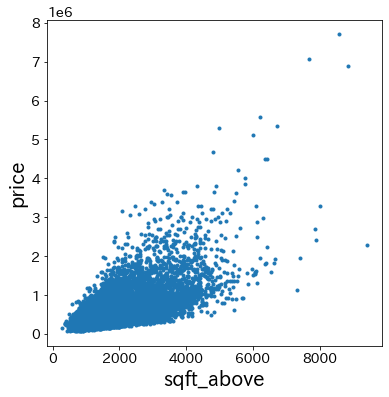

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(X["sqft_above"], y, marker=".")
plt.xlabel("sqft_above")
plt.ylabel("price")

`sqft_living <= 3935.0 & lat <= 47.5314998626709	rule	-8.271074e+04	0.377800	40101.257833` のルールに該当するデータのみ抽出してみます。
係数がマイナスになっているので、このルールに該当するデータのy(`price`)は低い傾向にあるはずです。
log(y)を箱髭図で確認すると、確かにルールに該当しているデータのyはルールに該当しないデータのyと比較すると低くなっています。

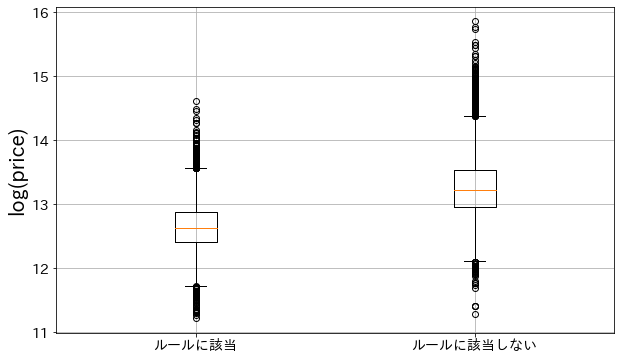

In [8]:
applicable_data = np.log(
    y[X.query("sqft_living <= 3935.0 & lat <= 47.5314998626709").index]
)
not_applicable_data = np.log(
    y[X.query("not(sqft_living <= 3935.0 & lat <= 47.5314998626709)").index]
)

plt.figure(figsize=(10, 6))
plt.boxplot([applicable_data, not_applicable_data], labels=["ルールに該当", "ルールに該当しない"])
plt.ylabel("log(price)")
plt.grid()
plt.show()